In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import string
import re  

# Download the stopwords list if you haven't already
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Federico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
path = "Scripts TBBT.csv"
df = pd.read_csv(path,sep=",", skipinitialspace = True, engine ="python")

In [90]:
# Let's choose a character to analyse

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()


# 1.

On average, how many sentences and words does your character have to speak per episode? Does this deviate across seasons?

To answer this question we will have to perform sentence and word tokenization. To do so we will lowercase the text immediately and remove the punctation only after sentence tokenization. 


In [91]:
# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

# Sentence Tokenization
df_character["sentences"] = df_character['dialogue'].apply(sent_tokenize)

# Remove punctuation using the default pattern
df_character['dialogue'] = df_character['dialogue'].str.replace(punctuation_pattern, '', regex=True)

# Word tokenization using the contractions library
import contractions
df_character['words'] = (df_character['dialogue'].apply(contractions.fix)).str.split()

# Using .split() instead of word_tokenize to also handle contractions:
#  We want "there's" to be counted as two words ("there" and "is"), instead of 3 like we would have using
#  tokenization on rules ("there" "'" "s")

# Display the DataFrame
df_character

,episode_name,dialogue,person_scene,sentences,words
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,[ So if a photon is directed through a plane w...,"[So, if, a, photon, is, directed, through, a, ..."
3,Series 01 Episode 01 – Pilot Episode,There’s no point I just think it’s a good ide...,Sheldon,"[ There’s no point, I just think it’s a good i...","[There, is, no, point, I, just, think, it, is,..."
10,Series 01 Episode 01 – Pilot Episode,I think this is the place,Sheldon,[I think this is the place.],"[I, think, this, is, the, place]"
14,Series 01 Episode 01 – Pilot Episode,Leonard I don’t think I can do this,Sheldon,"[ Leonard, I don’t think I can do this.]","[Leonard, I, do, not, think, I, can, do, this]"
16,Series 01 Episode 01 – Pilot Episode,No We are committing genetic fraud There’s no...,Sheldon,"[ No., We are committing genetic fraud., There...","[No, We, are, committing, genetic, fraud, Ther..."
...,...,...,...,...,...
54397,Series 10 Episode 24 – The Long Distance Disso...,Uh breakfast yes lunch no I did have a cough ...,Sheldon,"[ Uh, breakfast yes, lunch no., I did have a c...","[Uh, breakfast, yes, lunch, no, I, did, have, ..."
54399,Series 10 Episode 24 – The Long Distance Disso...,How thoughtful Thank you,Sheldon,"[How thoughtful., Thank you.]","[How, thoughtful, Thank, you]"
54401,Series 10 Episode 24 – The Long Distance Disso...,And I with you Question are you seeking a rom...,Sheldon,"[ And I with you., Question, are you seeking a...","[And, I, with, you, Question, are, you, seekin..."
54403,Series 10 Episode 24 – The Long Distance Disso...,Well that would raise a number of problems We...,Sheldon,"[ Well, that would raise a number of problems....","[Well, that, would, raise, a, number, of, prob..."


In [92]:
# Counting the words and the sentences per dialogue

df_character['words_count'] = df_character['words'].apply(lambda x: len(x))
df_character['sentences_count'] = df_character['sentences'].apply(lambda x: len(x))

df_character

,episode_name,dialogue,person_scene,sentences,words,words_count,sentences_count
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,[ So if a photon is directed through a plane w...,"[So, if, a, photon, is, directed, through, a, ...",57,2
3,Series 01 Episode 01 – Pilot Episode,There’s no point I just think it’s a good ide...,Sheldon,"[ There’s no point, I just think it’s a good i...","[There, is, no, point, I, just, think, it, is,...",15,1
10,Series 01 Episode 01 – Pilot Episode,I think this is the place,Sheldon,[I think this is the place.],"[I, think, this, is, the, place]",6,1
14,Series 01 Episode 01 – Pilot Episode,Leonard I don’t think I can do this,Sheldon,"[ Leonard, I don’t think I can do this.]","[Leonard, I, do, not, think, I, can, do, this]",9,1
16,Series 01 Episode 01 – Pilot Episode,No We are committing genetic fraud There’s no...,Sheldon,"[ No., We are committing genetic fraud., There...","[No, We, are, committing, genetic, fraud, Ther...",37,4
...,...,...,...,...,...,...,...
54397,Series 10 Episode 24 – The Long Distance Disso...,Uh breakfast yes lunch no I did have a cough ...,Sheldon,"[ Uh, breakfast yes, lunch no., I did have a c...","[Uh, breakfast, yes, lunch, no, I, did, have, ...",21,2
54399,Series 10 Episode 24 – The Long Distance Disso...,How thoughtful Thank you,Sheldon,"[How thoughtful., Thank you.]","[How, thoughtful, Thank, you]",4,2
54401,Series 10 Episode 24 – The Long Distance Disso...,And I with you Question are you seeking a rom...,Sheldon,"[ And I with you., Question, are you seeking a...","[And, I, with, you, Question, are, you, seekin...",13,2
54403,Series 10 Episode 24 – The Long Distance Disso...,Well that would raise a number of problems We...,Sheldon,"[ Well, that would raise a number of problems....","[Well, that, would, raise, a, number, of, prob...",21,3


To better understand how we tokenized the words, we can look at a specific case:

In [99]:
df_character["words"].iloc[36]

['If',
 'by',
 'holy',
 'smokes',
 'you',
 'mean',
 'a',
 'derivative',
 'restatement',
 'of',
 'the',
 'kind',
 'of',
 'stuff',
 'you',
 'can',
 'find',
 'scribbled',
 'on',
 'the',
 'wall',
 'of',
 'any',
 'men’s',
 'room',
 'at',
 'MIT',
 'sure']

This specific sentence shows why we decided to use '.split()' (to tokenize on white spaces) instead of tokenizing based on rules or punctuation. We first controlled for contractions, while treating English possessives as one token, as in the case of 'men’s' in 'men’s room'.


We will now calculate the average words and sentences for episodes

In [100]:
total_episodes = df['episode_name'].nunique()

total_words = df_character['words_count'].sum()
total_sentences = df_character['sentences_count'].sum()

average_words_per_episode = total_words / total_episodes
print(f"Average words for episodes: {average_words_per_episode:.2f}")

average_sentences_per_episode = total_sentences / total_episodes
print(f"Average senteces for episodes: {average_sentences_per_episode:.2f}")


Average words for episodes: 774.94
Average senteces for episodes: 94.48


To calculate the average number of words and sentences for episode we have to:

1. Create a "season" column based on the "episode_name."
1. Group the data by the newly created "season" and episode.
1. Calculate the number of episodes in each season.
1. Calculate the total number of words for each episode within the selected character's dialogue.
1. Finally, compute the average number of words spoken per episode per season.

In [101]:
# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# For words

# Group by season and episode, calculate the sum of words for each episode
episode_word_counts = df_character.groupby(['season', 'episode_name'])['words_count'].sum().reset_index()

# Calculate the number of episodes in each season
season_episode_counts = episode_word_counts.groupby('season')['episode_name'].count()

# Calculate the total number of words per season
season_word_counts = episode_word_counts.groupby('season')['words_count'].sum()

# Compute the average number of words spoken per episode per season
average_words_per_episode_per_season = season_word_counts / season_episode_counts

print("Average Words Spoken per Episode per Season for Character:", assigned_character)
print(average_words_per_episode_per_season)

print(f"Average words for episodes: {average_words_per_episode:.2f}")

# For sentences

# Group by season and episode, calculate the sum of words for each episode
episode_sentences_counts = df_character.groupby(['season', 'episode_name'])['sentences_count'].sum().reset_index()

# Calculate the total number of sentences per season
season_sentences_counts = episode_sentences_counts.groupby('season')['sentences_count'].sum()

# Compute the average number of sentences spoken per episode per season
average_sentences_per_episode_per_season = season_sentences_counts / season_episode_counts

print("Average sentences Spoken per Episode per Season for Character:", assigned_character)
print(average_sentences_per_episode_per_season)

print(f"Average sentences for episodes: {average_sentences_per_episode:.2f}")


Average Words Spoken per Episode per Season for Character: Sheldon
season
1     902.529412
2     881.217391
3     905.173913
4     801.708333
5     753.333333
6     693.250000
7     696.791667
8     735.125000
9     737.083333
10    690.291667
dtype: float64
Average words for episodes: 774.94
Average sentences Spoken per Episode per Season for Character: Sheldon
season
1      94.352941
2     100.695652
3     110.652174
4     104.125000
5      96.041667
6      88.416667
7      88.375000
8      88.583333
9      90.083333
10     84.416667
dtype: float64
Average sentences for episodes: 94.48


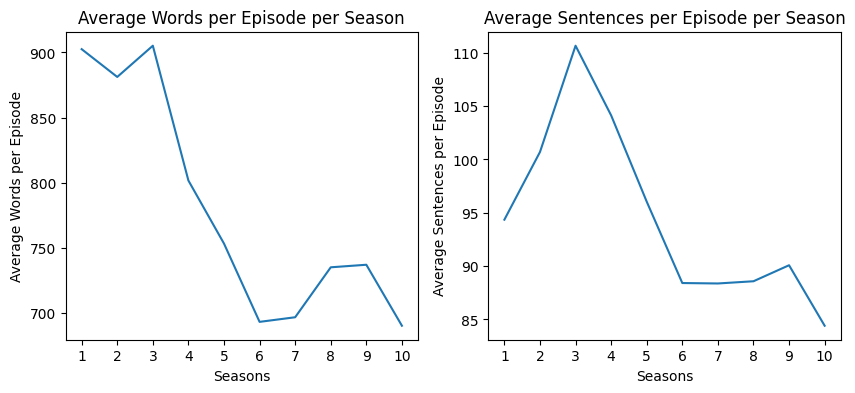

In [106]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].plot(average_words_per_episode_per_season)
axes[0].set_title('Average Words per Episode per Season')
axes[0].set_xlabel('Seasons')
axes[0].set_ylabel('Average Words per Episode')
axes[0].set_xticks(average_words_per_episode_per_season.index)

axes[1].plot(average_sentences_per_episode_per_season)
axes[1].set_title('Average Sentences per Episode per Season')
axes[1].set_xlabel('Seasons')
axes[1].set_ylabel('Average Sentences per Episode')
axes[1].set_xticks(average_sentences_per_episode_per_season.index)



plt.show()

For the first three seasons, there is small a variation on the average number of pronounced words per episode, while afterwards there is a stable decrease until the 6th season. In general we have two different level of spoken words by Sheldon, one for the first three seasons and one for the last five. From the second graph, we can assume that Sheldon is pronouncing more elaborated arguments in the first season than in the third since approximately the same number of words are spoken by him in the first three seasons. 

One possible reason is that Sheldon's presence in the tv show become less important in the last part of the show. Another possibility is that other characters' 


# 2. 

Globally, over all episodes within the first 10 seasons, how many times does your
character mention nouns, and person names? 

Make a Wordcloud of this tag/entity to
have a clear visualization which nouns/person names are mostly used by your character.

In [107]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()


Stopwords were removed from the dialogues, to improve the efficiency of POS tagging, as stopwords removal decreases the data by removing a lot of words that have no semantic meaning.

Moreover, dialogues were tokenized and lowered cased. Finally punctuation was removed.

In [111]:
import spacy
from collections import Counter


# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

df_character['dialogue'] = df_character['dialogue'].str.lower()

# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Process the entire dialogue column using nlp.pipe()
processed_dialogues = nlp.pipe(df_character["dialogue"])

# Extract nouns and proper nouns, remove stop words, and flatten the list
noun_propn_list = [
    token.text 
    for doc in processed_dialogues 
    for token in doc 
    if token.pos_ in ["NOUN", "PROPN"] and not token.is_stop and token.text not in string.punctuation
]

# Count the occurrences of each nouns or person names
type_counter = Counter(noun_propn_list)

# Print the ten most frequents
print("Ten most frequent nouns or person names:")
for token, count in type_counter.most_common(10):
    print(f"{token}: {count}")


Ten most frequent nouns or person names:
knock: 838
leonard: 720
penny: 504
time: 384
people: 209
man: 198
way: 193
night: 159
day: 155
course: 152


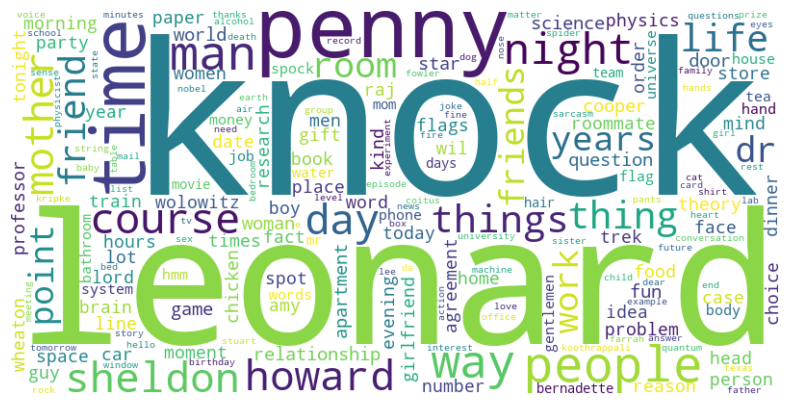

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(type_counter)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see also from the wordcloud, the most pronounced words by Sheldon are: 'knock', 'leonard' and 'penny'. The presence of the word 'knock' is explainable by the common situation in the show, where he knocks many times on a door. Apparently in the dataset the sound 'knock' is considered to be part of a dialogue, and we decided to keep it in the dataset as we thought it is also representative of the character. The other two words are the names of two more characters of the tv show. 

In [117]:
# Calculate the number of unique nouns or proper nouns
num_unique_nouns_propns = len(type_counter)

# Print the result
print(f"Number of unique nouns or proper nouns: {num_unique_nouns_propns}")


Number of unique nouns or proper nouns: 8387


The total number of unique nouns or proper nouns is 8387.

Named Entity Recognition (NER) is applied on the original dialogues. NER relies on the context and semantics of the text to find person names. Punctuation and stopwords were not removed so as not to lose important information regarding the context of the text. Nevertheless,
while solving the exercise we also tried to apply NER to find the person names, but the result was not satisfactory.

In [118]:
def NER(string):
    doc = nlp(string.lower())
    names = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    names_punct_remov = []
    for i in names:
        if i not in '!@#$%^&*()_-+={}[]:;"\'|<>,.?/~`’':
            names_punct_remov.append(i)
    return names_punct_remov

In [119]:
df_character['Person_Entities']=df_character['dialogue'].apply(NER)

In [120]:
name_entities = df_character['Person_Entities'].tolist()

names_cleaned = []
for name in name_entities:
    if not len(name)==0:
        names_cleaned.append(' '.join(name))
print(names_cleaned)

['klingon boggle', 'leonard', 'leonard', 'joyce kim', 'lois lane lane', 'dr gablehouser', 'n’t kow-tow', 'dr gablehouser', 'dr gablehouser', 'mrs goldfarb', 'sheldon', 'blah blah blah blah blah', 'b&b', 'virgin diet cuba', 'lee', 'dr emile farminfarmian', 'influenza', 'kitty kitty', 'dennis kim', 'dennis kim', 'nuevo cherusalem', 'webster jacques cousteau', 'william shatner', 'rod taylor', 'kirk', 'rod taylor yvette', 'aaaaargh sheldon', 'mee krob', 'leonard', 'gei wo kan zi pei gei wo kan zi pei', 'menelaus', 'leonard', 'yip yip yip yip', 'erwin schrodinger', 'hou zi shui zai li du.', 'klingon', 'sarah connor', 'berry', 'julie newmar michelle pfieffer eartha kitt', 'lee', 'julie newmar michelle pfieffer eartha kitt lee meriwether', 'jesus', 'leonard', 'barry', 'sheldon', 'robert e. howard’s', 'dr gablehauser', 'dr gablehauser', 'tom', 'tom', 'tom tom tom', 'tom', 'dr gablehauser', 'abraham lincoln', 'leonard', 'leonard', 'albert einstein', 'luke skywalker’s', 'leonard', 'homo novus', 

In [121]:
names_dict = {}
for name in names_cleaned:
    if name not in names_dict:
        names_dict[name]=0
    names_dict[name]+=1
#print(names_dict)

sorted_names_dict = dict(sorted(names_dict.items(), key=lambda item: item[1], reverse=True))
print(sorted_names_dict)

{'leonard': 51, 'howard': 46, 'sheldon cooper': 32, 'farrah fowler': 18, 'mm': 12, 'barry': 10, 'sheldon': 9, 'alex': 8, 'arthur': 8, 'richard feynman': 7, 'nowitzki': 7, 'lee': 6, 'jesus': 6, 'koothrappali': 6, 'bernadette': 6, 'stan lee': 6, 'd’onofrio': 6, 'bert': 6, 'klingon': 5, 'howard wolowitz': 5, 'cooper': 5, 'wil wheaton': 5, 'isaac newton': 5, 'spock': 5, 'wolowitz': 5, 'kirk': 4, 'albert einstein': 4, 'george': 4, 'elizabeth': 4, 'zack': 4, 'bill nye': 4, 'dr gablehouser': 3, 'mee krob': 3, 'dr gablehauser': 3, 'tom': 3, 'dr. hofstadter': 3, 'hofstadter': 3, 'jack': 3, 'joe': 3, 'siebert': 3, 'jenson': 3, 'stephen hawking': 3, 'dr. fowler': 3, 'james earl jones': 3, 'taylor': 3, 'jennifer lawrence': 3, 'petrescu': 3, 'klingon boggle': 2, 'kitty kitty': 2, 'dennis kim': 2, 'neil armstrong': 2, 'vartabedian': 2, 'sarah': 2, 'kitty': 2, 'seibert': 2, 'crawley': 2, 'riley': 2, 'larry': 2, 'judas': 2, 'william': 2, 'ralph': 2, 'mm mm mm': 2, 'jesus fourth': 2, 'tyson': 2, 'bush'

As we can see 'leonard' was found less time than when we used POS to find proper nouns, so we decided to use the other solution, although that meant losing some informations (like having names and surnames as one token, like we can see for 'sheldon cooper': 32).

# 3.

What are the most important words mentioned by your character? Do this analysis
per episode, per season and overall over the first 10 seasons. To achieve this task,
please first make a bag-of-words and/or use the TF-IDF statistical principle. Remark:
You can try to make a Wordcloud for visualization, based on the given bag-of-words.

In [3]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()

In [5]:
stop_words = set(stopwords.words('english'))

def tokenize_lower_punct(dialogue_string):
    if isinstance(dialogue_string, str):
        dialogue_list = nltk.word_tokenize(dialogue_string)
        dialogue_list_lower = [i.lower() for i in dialogue_list]
        punctuation = '!@#$%^&*()_-+={}[]:;"\'|<>,.?/~`’'
        dialogue_list_cleaned = []
        for i in dialogue_list_lower:
            if not i in punctuation:
                dialogue_list_cleaned.append(i)
        removed_stopwords_list = [w for w in dialogue_list_cleaned if w not in stop_words]
        return ' '.join(removed_stopwords_list)
    else:
        return []
    

df_character['words_no_stopwords'] = df_character['dialogue'].apply(tokenize_lower_punct)

In [10]:
def extract_season(string):
    return int(string[7:9])
df_character['season']=df_character['episode_name'].apply(extract_season)
df_character.head(10)

,episode_name,dialogue,person_scene,words_no_stopwords,season
1,Series 01 Episode 01 – Pilot Episode,So if a photon is directed through a plane wi...,Sheldon,photon directed plane two slits either slit ob...,1
3,Series 01 Episode 01 – Pilot Episode,"There’s no point, I just think it’s a good id...",Sheldon,point think good idea tee-shirt,1
10,Series 01 Episode 01 – Pilot Episode,I think this is the place.,Sheldon,think place,1
14,Series 01 Episode 01 – Pilot Episode,"Leonard, I don’t think I can do this.",Sheldon,leonard think,1
16,Series 01 Episode 01 – Pilot Episode,No. We are committing genetic fraud. There’s ...,Sheldon,committing genetic fraud guarantee sperm going...,1
18,Series 01 Episode 01 – Pilot Episode,"I know, and I do yearn for faster downloads, ...",Sheldon,know yearn faster downloads poor woman going p...,1
20,Series 01 Episode 01 – Pilot Episode,I wouldn’t.,Sheldon,,1
22,Series 01 Episode 01 – Pilot Episode,I want to leave.,Sheldon,want leave,1
24,Series 01 Episode 01 – Pilot Episode,What’s the protocol for leaving?,Sheldon,protocol leaving,1
26,Series 01 Episode 01 – Pilot Episode,Let’s try just walking out.,Sheldon,let try walking,1


In [12]:
seasons_dict = {}
for (season, episode), sub_df in df_character.groupby(['season', 'episode_name']):
    dialogues_list = sub_df['words_no_stopwords'].tolist()
    if season not in seasons_dict:
        seasons_dict[season] = {}
    seasons_dict[season][episode] = dialogues_list

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

for season, episodes in seasons_dict.items():
        print(f"Season {season}:")
        for episode, dialogue_list in episodes.items():
            episode_text = ' '.join(dialogue_list)
            tfidf_vectorizer = TfidfVectorizer()
            if episode_text.strip():
                X_tfidf = tfidf_vectorizer.fit_transform([episode_text])
                feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
                importance_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
                top_n = 10
                top_words = importance_df.sum().sort_values(ascending=False).head(top_n)
                print(f"\nEpisode {episode} - Top {top_n} Important Words:")
                print(top_words)
            else: 
                print(f"\nEpisode {episode} - No dialogues available.")

Season 1:

Episode Series 01 Episode 01 – Pilot Episode - Top 10 Important Words:
think      0.311740
going      0.249392
yes        0.218218
leonard    0.218218
woman      0.187044
well       0.187044
time       0.155870
two        0.155870
know       0.124696
oh         0.124696
dtype: float64

Episode Series 01 Episode 02 – The Big Bran Hypothesis - Top 10 Important Words:
penny             0.319398
want              0.177443
per               0.141955
think             0.141955
sarcasm           0.141955
well              0.141955
organisational    0.106466
little            0.106466
put               0.106466
two               0.106466
dtype: float64

Episode Series 01 Episode 03 – The Fuzzy Boots Corollary - Top 10 Important Words:
oh         0.304348
well       0.260870
think      0.173913
leonard    0.173913
would      0.173913
cat        0.130435
okay       0.130435
one        0.130435
two        0.130435
penny      0.130435
dtype: float64

Episode Series 01 Episode 04 – The L

In [21]:
for season, episodes in seasons_dict.items():
    print(f"Season {season}:")
    season_text = ' '.join([' '.join(dialogue_list) for dialogue_list in episodes.values()])
    if season_text.strip():
        tfidf_vectorizer = TfidfVectorizer()
        X_tfidf = tfidf_vectorizer.fit_transform([season_text])
        feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
        importance_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
        top_n = 10  # Adjust as needed
        top_words = importance_df.sum().sort_values(ascending=False).head(top_n)
        print(f"Top {top_n} Important Words:")
        print(top_words)
    else:
        print("No dialogues available for this season.")

Season 1:
Top 10 Important Words:
well       0.300125
leonard    0.264816
would      0.250693
knock      0.225976
oh         0.225976
one        0.187137
penny      0.176544
know       0.176544
going      0.169482
think      0.165951
dtype: float64
Season 2:
Top 10 Important Words:
leonard    0.275470
penny      0.261271
oh         0.255591
well       0.195953
one        0.195953
know       0.193113
knock      0.187433
would      0.187433
like       0.170394
going      0.161874
dtype: float64
Season 3:
Top 10 Important Words:
knock      0.421108
leonard    0.272333
oh         0.249639
penny      0.229466
right      0.206772
well       0.204250
one        0.184077
would      0.168948
going      0.166426
like       0.143731
dtype: float64
Season 4:
Top 10 Important Words:
knock      0.300804
oh         0.259026
leonard    0.247885
penny      0.211677
one        0.200536
right      0.194966
yes        0.189395
know       0.181040
well       0.178254
like       0.164328
dtype: float64
Seas


Top 20 Important Words Across All Episodes:
oh         0.328872
well       0.278115
knock      0.258593
know       0.248081
leonard    0.224354
like       0.202429
one        0.193119
right      0.168791
would      0.154074
penny      0.151672
get        0.142962
going      0.138757
good       0.125242
yes        0.125242
see        0.121337
think      0.118634
time       0.115331
go         0.115030
amy        0.104518
yeah       0.100314
dtype: float64


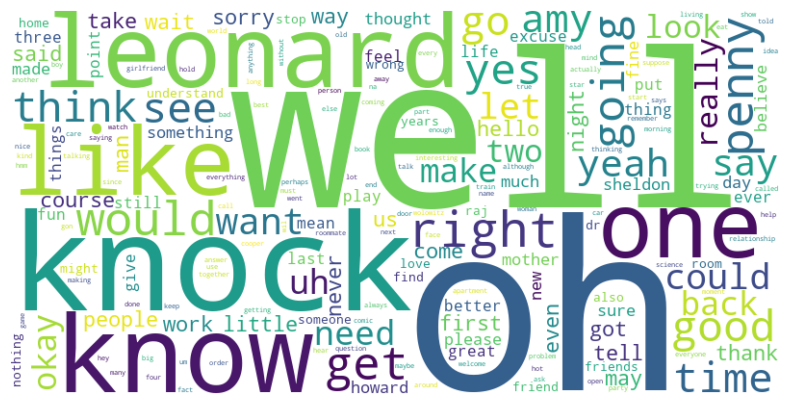

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Overall for all 

all_dialogues = [' '.join(dialogues) for episodes in seasons_dict.values() for dialogues in episodes.values()]
all_text = ' '.join(all_dialogues)

tfidf_vectorizer = TfidfVectorizer()
X_tfidf_all = tfidf_vectorizer.fit_transform([all_text])
feature_names_all = np.array(tfidf_vectorizer.get_feature_names_out())
importance_df_all = pd.DataFrame(X_tfidf_all.toarray(), columns=feature_names_all)
aggregate_scores = importance_df_all.sum()

top_n_all = 20
top_words_all = aggregate_scores.sort_values(ascending=False).head(top_n_all)
print(f"\nTop {top_n_all} Important Words Across All Episodes:")
print(top_words_all)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(aggregate_scores.to_dict())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3.1

In [122]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()

In [123]:
import spacy
from collections import Counter
from nltk.corpus import stopwords
import re

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

df_character['dialogue'] = df_character['dialogue'].str.lower()

# Process the entire dialogue column using nlp.pipe()
processed_dialogues = nlp.pipe(df_character["dialogue"])

# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Extract nouns and proper nouns, remove stop words, and flatten the list for each row
df_character['words'] = df_character['dialogue'].apply(lambda text: [
    token.text 
    for token in nlp(text) 
    if token.pos_ in ["NOUN", "PROPN","VERB","ADV"] and not token.is_stop and token.text not in string.punctuation
])

After cleaning and preprocessing the text data by removing punctuation, converting to lowercase, and removing stop words, we can proceed creating a bag-of-words (TF-IDF representation will be done after)

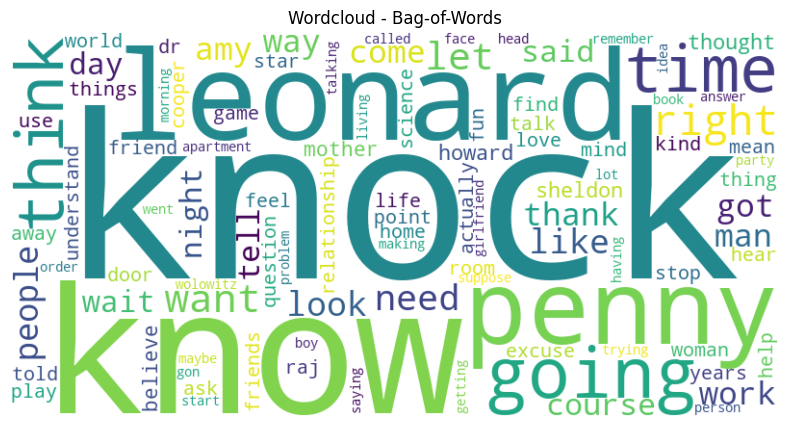

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Combine the lists of words into space-separated strings
df_character['cleaned_text'] = df_character['words'].apply(lambda x: ' '.join(x))

# Create a bag-of-words representation with the custom tokenizer
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df_character['cleaned_text'])

# Sum the counts across all documents to get the total frequency of each word
word_frequencies = np.sum(bow_matrix, axis=0)

# Create a dictionary of word frequencies
word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_frequencies.A1))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud - Bag-of-Words')
plt.show()


In [125]:
# Identify the top 10 most frequent words
top_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:10]
top_word_frequencies = [word_freq_dict[word] for word in top_words]

# Print the top 10 most frequent words and their frequencies
for word, frequency in zip(top_words, top_word_frequencies):
    print(f"{word}: {frequency} times")


knock: 860 times
know: 825 times
leonard: 739 times
penny: 504 times
going: 462 times
think: 395 times
time: 384 times
right: 358 times
want: 315 times
let: 300 times


What we did here is not particularly different from what was done for question two, apart from the inclusion of verbs and adverbs. To achieve more interesting results, we will apply TF-IDF

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df_character is your DataFrame with 'dialogue' column
df_character['dialogue'] = df_character['dialogue'].str.lower()

# Define a function to process each dialogue and extract relevant words based on POS
def process_dialogue(dialogue):
    doc = nlp(dialogue)
    relevant_words = [
        token.text
        for token in doc
        if token.pos_ in ["NOUN", "PROPN", "ADJ", "VERB"] and not token.is_stop and not token.is_punct
    ]
    return ' '.join(relevant_words)

# Apply the function to each dialogue in the DataFrame
df_character['processed_dialogue'] = df_character['dialogue'].apply(process_dialogue)

# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the processed dialogues to obtain the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(df_character['processed_dialogue'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

: 

In [51]:
# Calculate the sum of TF-IDF scores for each term across all documents
term_importance = tfidf_df.sum(axis=0)

# Create a DataFrame to display the term importance
term_importance_df = pd.DataFrame({
    'Term': term_importance.index,
    'Importance': term_importance.values
})

# Sort the DataFrame by importance in descending order
term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important terms
top_terms = term_importance_df.head(10)
print(top_terms)


          Term  Importance
6392      know  187.102891
6594   leonard  183.870809
4943     going  129.287824
4957      good  127.052772
11624    think  119.365190
8339     penny  115.291463
6387     knock  103.625605
12494     want  103.067199
11587    thank  100.219528
11701     time   90.014299


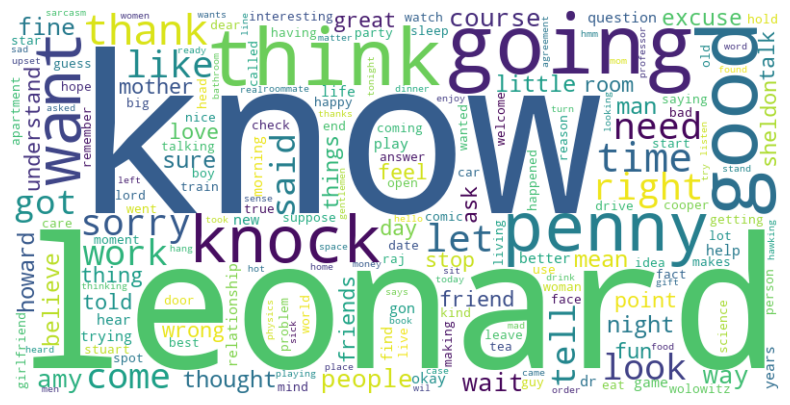

In [47]:
# Create a dictionary with terms and their importance scores
term_importance_dict = dict(zip(term_importance_df['Term'], term_importance_df['Importance']))

# Generate a word cloud using the TF-IDF scores as weights
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(term_importance_dict)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now we can do the same by series and episodes (only with TF-IDF)

In [54]:

# Create a "season" column based on "episode_name"
df_character['season'] = df_character['episode_name'].str.extract(r'Series (\d+)')[0].astype(int)

# Initialize an empty list to store DataFrames for each season
season_dfs = []

# Loop through each season
for season in range(1, 11):
    # Filter the DataFrame for the current season using .loc
    season_df = df_character.loc[df_character['season'] == season].copy()

    # Apply the function to each dialogue in the filtered DataFrame
    season_df['processed_dialogue'] = season_df['dialogue'].apply(process_dialogue)

    # Create a TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the processed dialogues to obtain the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(season_df['processed_dialogue'])

    # Convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Create a bag-of-words representation for the current season
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(season_df['cleaned_text'])

    # Calculate the sum of TF-IDF scores for each term across all documents
    term_importance = tfidf_df.sum(axis=0)

    # Create a DataFrame to display the term importance
    term_importance_df = pd.DataFrame({
        'Term': term_importance.index,
        'Importance': term_importance.values
    })

    # Sort the DataFrame by importance in descending order
    term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False).head(10)

    # Create a list of top words for the current season
    top_words_for_season = term_importance_df['Term'].tolist()
    
    # Create a DataFrame for the current season's top words
    season_top_words_df = pd.DataFrame({'Season': [season] * 10, 'Top Words': top_words_for_season})
    
    # Append the DataFrame to the list
    season_dfs.append(season_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_season = pd.concat(season_dfs, ignore_index=True)

# Print the results
for season in range(1, 11):
    print(f"Season {season}: ", end="")
    for word in range(0, 10):
        words_for_season = top_words_per_season.loc[top_words_per_season['Season'] == season, 'Top Words'].iloc[word]
        print(f"{words_for_season} ", end="")
    print()  # Add a newline after each season


Season 1: leonard think know going penny good time want need course 
Season 2: leonard penny know going good knock work let time want 
Season 3: leonard knock penny going good want know sorry thank right 
Season 4: leonard know thank going penny good think knock howard amy 
Season 5: leonard know going knock good penny time think like let 
Season 6: know leonard want think knock going let good time thank 
Season 7: know leonard think good going want penny right come time 
Season 8: know leonard good think want thank right going let knock 
Season 9: know leonard think thank going good got time like let 
Season 10: know leonard think thank need want going amy good room 


By episode

In [55]:
import re

# Extract season and episode numbers using regular expressions
season_episode_pattern = re.compile(r'Series (\d+) Episode (\d+)')
matches = df_character['episode_name'].str.extract(season_episode_pattern)

# Combine the extracted season and episode numbers to create the new column
df_character['season_episode'] = matches[0].str.zfill(2) + '-' + matches[1].str.zfill(2)

# Print the DataFrame to check the new column
print(df_character[['episode_name', 'season_episode']])


                                            episode_name season_episode
1                   Series 01 Episode 01 – Pilot Episode          01-01
3                   Series 01 Episode 01 – Pilot Episode          01-01
10                  Series 01 Episode 01 – Pilot Episode          01-01
14                  Series 01 Episode 01 – Pilot Episode          01-01
16                  Series 01 Episode 01 – Pilot Episode          01-01
...                                                  ...            ...
54397  Series 10 Episode 24 – The Long Distance Disso...          10-24
54399  Series 10 Episode 24 – The Long Distance Disso...          10-24
54401  Series 10 Episode 24 – The Long Distance Disso...          10-24
54403  Series 10 Episode 24 – The Long Distance Disso...          10-24
54405  Series 10 Episode 24 – The Long Distance Disso...          10-24

[11484 rows x 2 columns]


In [56]:
# Initialize an empty list to store DataFrames for each episode
episode_dfs = []

# Loop through each episode
for season_episode in df_character['season_episode'].unique():
    # Filter the DataFrame for the current episode using .loc
    episode_df = df_character.loc[df_character['season_episode'] == season_episode].copy()

    # Apply the function to each dialogue in the filtered DataFrame
    episode_df['processed_dialogue'] = episode_df['dialogue'].apply(process_dialogue)

    # Create a TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the processed dialogues to obtain the TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform(episode_df['processed_dialogue'])

    # Convert the TF-IDF matrix to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    
    # Create a bag-of-words representation for the current season
    vectorizer = CountVectorizer()
    bow_matrix = vectorizer.fit_transform(episode_df['cleaned_text'])

    # Calculate the sum of TF-IDF scores for each term across all documents
    term_importance = tfidf_df.sum(axis=0)

    # Create a DataFrame to display the term importance
    term_importance_df = pd.DataFrame({
        'Term': term_importance.index,
        'Importance': term_importance.values
    })

    # Sort the DataFrame by importance in descending order
    term_importance_df = term_importance_df.sort_values(by='Importance', ascending=False).head(10)
    
    # Create a list of top words for the current episode
    top_words_for_episode = term_importance_df['Term'].tolist()
    
    # Create a DataFrame for the current episode's top words
    episode_top_words_df = pd.DataFrame({'Episode': [season_episode] * 10, 'Top Words': top_words_for_episode})

    # Append the DataFrame to the list
    episode_dfs.append(episode_top_words_df)

# Concatenate all DataFrames into a single DataFrame
top_words_per_episode = pd.concat(episode_dfs, ignore_index=True)

# Print the results
for episode_name in df_character['season_episode'].unique():
    print(f"{episode_name}: ", end="")
    for word in range(0, 5):
        words_for_episode = top_words_per_episode.loc[top_words_per_episode['Episode'] == episode_name, 'Top Words'].iloc[word]
        print(f"{words_for_episode} ", end="")
    print()  # Add a newline after each episode


01-01: hi think leonard going sit 
01-02: sarcasm penny think check hang 
01-03: leonard tell date lord good 
01-04: going know time morning mom 
01-05: leonard boy big lucky come 
01-06: costume good people party doppler 
01-07: night halo penny know good 
01-08: punchali diet princess indian know 
01-09: little work look idea know 
01-10: knock leonard penny lied leo 
01-11: soup sick leonard need want 
01-12: leonard goodbye sure work think 
01-13: course protest answer team formal 
01-14: time machine bid turn know 
01-15: sister missy wants rajesh way 
01-16: think leonard dvd know suppose 
01-17: schrodinger cat chicken mistake assumed 
02-01: tell secret leonard penny know 
02-02: mean leonard penny leslie know 
02-03: penny tom danger stand bedroom 
02-04: people tell smiles lucky want 
02-05: know penny work good drive 
02-06: clause nice girl eat dinner 
02-07: penny strike thank night laundry 
02-08: going leonard office believe ask 
02-09: stephanie leonard good come relati

# 4.

Examine the co-occurence of words for your character by using the Positive Pointwise Mutual Information measurement. Which words are commonly used together in his/her dialogues? Remark: You can try to make a Word-Word co-occurence matrix.

In [4]:
# Let's reload the data for our character 

assigned_character = "Sheldon"

df_character = df[df['person_scene'] == assigned_character].copy()

## Text Preprocessing

Before extracting meaningful words from the dialogue column, the following preprocessing steps are applied:

1. **Missing Values Handling:** Any missing values in the 'dialogue' column are replaced with an empty string.

2. **Lowercasing:** All text in the 'dialogue' column is converted to lowercase for uniformity.

3. **SpaCy Tokenization:** The entire 'dialogue' column is processed using spaCy's language model for tokenization and linguistic analysis.

4. **Filtering Words:** Nouns, proper nouns, verbs, and adverbs are extracted from each dialogue. Stop words and punctuation are removed to focus on meaningful content.

The result is stored in the 'words' column for further analysis.


In [5]:
import spacy
from collections import Counter
from nltk.corpus import stopwords
import re

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Two lines have NA
df_character['dialogue'].fillna('', inplace=True)

df_character['dialogue'] = df_character['dialogue'].str.lower()

# Process the entire dialogue column using nlp.pipe()
processed_dialogues = nlp.pipe(df_character["dialogue"])

# Get the default punctuation characters from the string module
punctuation_pattern = f"[{re.escape(string.punctuation)}]"

# Extract nouns and proper nouns, remove stop words, and flatten the list for each row
df_character['words'] = df_character['dialogue'].apply(lambda text: [
    token.text 
    for token in nlp(text) 
    if token.pos_ in ["NOUN", "PROPN","VERB","ADV"] and not token.is_stop and token.text not in string.punctuation
])


## Co-occurrence Analysis within Dialogues

The code performs co-occurrence analysis within individual dialogues. The `generate_co_occurrences` function computes co-occurrence counts for each word pair within a specified context window, and the resulting counts are used to create a sparse co-occurrence matrix. This matrix represents how often words appear together within the same dialogue, providing insights into word relationships in localized contexts.

In [18]:
from collections import Counter
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer

tokenized_sentences = df_character["words"]

# Create a count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(tokens) for tokens in tokenized_sentences])

# Get the vocabulary and token-to-index mapping
vocabulary = vectorizer.get_feature_names_out()
tok2indx = {tok: indx for indx, tok in enumerate(vocabulary)}

# Function to generate co-occurrences within each dialogue
def generate_co_occurrences(tokens, window_size):
    """
    Generate co-occurrence counts for a set of tokens within a specified window.

    Parameters:
    - tokens (list): List of tokens representing a dialogue.
    - window_size (int): Size of the context window for co-occurrence.

    Returns:
    - Counter: Co-occurrence counts for word pairs.
    """
    co_occurrence_counts = Counter()

    for ii_word, word in enumerate(tokens):
        word_index = tok2indx.get(word, None)

        if word_index is not None:
            ii_context_min = max(0, ii_word - window_size)
            ii_context_max = min(len(tokens) - 1, ii_word + window_size)
            context_indices = [tok2indx.get(tokens[ii], None) for ii in range(ii_context_min, ii_context_max + 1) if ii != ii_word]

            for context_index in context_indices:
                if context_index is not None:
                    co_occurrence_counts[(word_index, context_index)] += 1

    return co_occurrence_counts

# Define window_size for co-occurrence
window_size = 2

# Initialize co-occurrence counter
co_occurrence_counts = Counter()

# Generate co-occurrences for each set of tokens within the same dialogue
for tokens in tokenized_sentences:
    current_co_occurrence_counts = generate_co_occurrences(tokens, window_size)
    co_occurrence_counts += current_co_occurrence_counts

# Convert co-occurrence counts to a sparse matrix
co_occurrence_mat = csr_matrix((list(map(int, co_occurrence_counts.values())), zip(*co_occurrence_counts.keys())))

# Print results for co-occurrences
print('number of co-occurrences: {}'.format(len(co_occurrence_counts)))
most_common_co_occurrences = [
    (vocabulary[co_occurrence[0]], vocabulary[co_occurrence[1]], count)
    for co_occurrence, count in co_occurrence_counts.most_common(10)
]
print('most common co-occurrences: {}'.format(most_common_co_occurrences))


number of co-occurrences: 147870
most common co-occurrences: [('knock', 'knock', 2028), ('knock', 'penny', 400), ('penny', 'knock', 400), ('knock', 'leonard', 202), ('leonard', 'knock', 202), ('da', 'da', 74), ('sheldon', 'cooper', 71), ('cooper', 'sheldon', 71), ('penny', 'penny', 68), ('star', 'trek', 59)]


The co-occurrence analysis reveals some patterns in the dialogues:

- **'Knock Knock' Phrase:** 'The most frequent co-occurrences involve the humorous phrase 'knock knock,' followed by the character Sheldon is looking for while knocking. The phrase is evidently often repeated by the character.

- **Star Trek references:** The instance ('star', 'trek') highlights the character's passion for the TV show Star Trek.

## Co-occurrence Matrix Creation

Using the co-occurrence counts obtained from the `generate_co_occurrences` function, a sparse word-word co-occurrence matrix (`co_occurrence_mat`) is created. The matrix is represented in the Compressed Sparse Row (CSR) format, where rows correspond to words, columns correspond to context words, and values represent the co-occurrence counts.


In [10]:
# Create lists to store row indices, column indices, and data values for the co-occurrence matrix
row_indxs_co_occurrence = []
col_indxs_co_occurrence = []
dat_values_co_occurrence = []

# Iterate through co-occurrences and populate the lists
for (tok1, tok2), co_occurrence_count in co_occurrence_counts.items():
    row_indxs_co_occurrence.append(tok1)
    col_indxs_co_occurrence.append(tok2)
    dat_values_co_occurrence.append(co_occurrence_count)

# Create the word-word co-occurrence matrix using a sparse CSR matrix
co_occurrence_mat = csr_matrix((dat_values_co_occurrence, (row_indxs_co_occurrence, col_indxs_co_occurrence)))


We will now calculate the word Similarity using the sparse matrix

In [54]:
from scipy import sparse
import numpy as np

# Create token-to-index and index-to-token mappings based on the vocabulary
tok2indx = {tok: indx for indx, tok in enumerate(vocabulary)}
indx2tok = {indx: tok for tok, indx in tok2indx.items()}

# Define the ww_sim function to calculate the topn most similar words to a given word based on occurrence
def ww_sim(word, mat, topn=10):
    """
    Calculate the topn most similar words to a given word based on word occurrence.

    Parameters:
        - word (str): The target word.
        - mat (csr_matrix): The word-word count matrix.
        - topn (int): Number of top similar words to retrieve.

    Returns:
        - list: A list of tuples containing similar words and their word occurrence counts.
    """
    indx = tok2indx[word]

    # Extract the row corresponding to the target word
    row = mat.getrow(indx).toarray()

    # Get the indices of non-zero elements in the row
    non_zero_indices = np.nonzero(row)[1]

    # Sort indices based on word occurrence counts in descending order
    sindxs = non_zero_indices[np.argsort(-row[0, non_zero_indices])]

    # Retrieve the topn most similar words and their word occurrence counts
    sim_word_counts = [(indx2tok[sindx], row[0, sindx]) for sindx in sindxs[0:topn]]
    return sim_word_counts




In [55]:
# Use the modified function with the original sparse matrix
similar_words = ww_sim('leonard', co_occurrence_mat)

# Print the results
print(f"Words similar: {similar_words}")

Words similar: [('knock', 202), ('penny', 53), ('know', 32), ('leonard', 30), ('come', 18), ('think', 18), ('going', 18), ('want', 17), ('hofstadter', 11), ('said', 10)]


The analysis reveals the top words that frequently co-occur with 'leonard.' These words are identified by their occurrence counts.

### Top 10 Occurrence Counts:
1. **'knock'** (Occurrence Count: 202)
2. **'penny'** (Occurrence Count: 53)
3. **'know'** (Occurrence Count: 32)
4. **'leonard'** (Occurrence Count: 30)
5. **'come'** (Occurrence Count: 18)
6. **'think'** (Occurrence Count: 18)
7. **'going'** (Occurrence Count: 18)
8. **'want'** (Occurrence Count: 17)
9. **'hofstadter'** (Occurrence Count: 11)
10. **'said'** (Occurrence Count: 10)


Is it also possible to normalize the word co-occurrence matrix using L2 norm to transform the raw word counts into a more meaningful and comparable representation.

In [58]:
from sklearn.preprocessing import normalize

# Normalize each row using L2 norm
co_occurrence_norm_mat = normalize(co_occurrence_mat, norm='l2', axis=1)

# Demonstrate normalization for a specific row
row = co_occurrence_mat.getrow(10).toarray().flatten()
print(f"L2 norm before normalization: {np.sqrt((row*row).sum())}")

row_normalized = co_occurrence_norm_mat.getrow(10).toarray().flatten()
print(f"L2 norm after normalization: {np.sqrt((row_normalized*row_normalized).sum())}")


L2 norm before normalization: 2.6457513110645907
L2 norm after normalization: 0.9999999999999999


In [59]:
ww_sim('leonard', co_occurrence_norm_mat)


[('knock', 0.8932895208087364),
 ('penny', 0.23437794357852984),
 ('know', 0.14151121121722557),
 ('leonard', 0.13266676051614898),
 ('come', 0.07960005630968939),
 ('think', 0.07960005630968939),
 ('going', 0.07960005630968939),
 ('want', 0.07517783095915108),
 ('hofstadter', 0.04864447885592129),
 ('said', 0.04422225350538299)]

# Calculate Positive Pointwise Mutual Information (PPMI) Matrix

The following code calculates the Positive Pointwise Mutual Information (PPMI) matrix based on the given word co-occurrence matrix (`co_occurrence_mat`). PPMI is a measure that reflects the strength of association between words, taking into account the probability of their co-occurrence relative to their individual probabilities.

Parameters:
- `co_occurrence_mat` (sparse.csr_matrix): The word co-occurrence matrix.
- `alpha` (float): Smoothing parameter (default is 0.75).

Returns:
- `ppmi_mat` (sparse.csr_matrix): The resulting PPMI matrix.


This code calculates Positive Pointwise Mutual Information (PPMI) for a given co-occurrence matrix. The function takes a sparse co-occurrence matrix (co_occurrence_mat) and an optional smoothing parameter (alpha). It returns a sparse PPMI matrix, where each element corresponds to the PPMI value for a word-context pair. The code iterates over each word and its contexts, calculates probabilities, and computes PMI and PPMI values. The resulting sparse PPMI matrix is then printed.

In [63]:
import numpy as np
from scipy import sparse

def calculate_ppmi(co_occurrence_mat, alpha=0.75):
    """
    Calculate Positive Pointwise Mutual Information (PPMI) for the co-occurrence matrix.

    Parameters:
        - co_occurrence_mat (sparse.csr_matrix): Word co-occurrence matrix.
        - alpha (float): Smoothing parameter (default is 0.75).

    Returns:
        - sparse.csr_matrix: PPMI matrix.
    """
    num_co_occurrences = co_occurrence_mat.sum()
    
    # Reusable quantities
    sum_over_words = np.array(co_occurrence_mat.sum(axis=0)).flatten()
    sum_over_contexts = np.array(co_occurrence_mat.sum(axis=1)).flatten()
    sum_over_words_alpha = sum_over_words**alpha
    nca_denom = np.sum(sum_over_words_alpha)

    row_indxs = []
    col_indxs = []
    ppmi_dat_values = []  # Positive Pointwise Mutual Information (PPMI) values

    ii = 0
    # Iterate over each word (tok_word) and its contexts (tok_context)
    for tok_word in range(co_occurrence_mat.shape[0]):
        for tok_context in range(co_occurrence_mat.shape[1]):
            nwc = co_occurrence_mat[tok_word, tok_context]

            # Skip if there are no co-occurrences
            if nwc == 0:
                continue
            
            # Calculate probabilities
            Pwc = nwc / num_co_occurrences
            nw = sum_over_contexts[tok_word]
            Pw = nw / num_co_occurrences
            nc = sum_over_words[tok_context]
            Pc = nc / num_co_occurrences
            nca = sum_over_words_alpha[tok_context]
            Pca = nca / nca_denom

            # Calculate PMI
            pmi = np.log2(Pwc / (Pw * Pc))

            # Calculate PPMI, ensuring non-negativity
            ppmi = max(pmi, 0)
            
            # Append values to construct the sparse PPMI matrix
            row_indxs.append(tok_word)
            col_indxs.append(tok_context)
            ppmi_dat_values.append(ppmi)

        ii += 1
        if ii % 1000 == 0:
            print(f'Finished {ii/co_occurrence_mat.shape[0]:.2%} of rows')

    # Create the sparse PPMI matrix
    ppmi_mat = sparse.csr_matrix((ppmi_dat_values, (row_indxs, col_indxs)))

    return ppmi_mat

# Calculate PPMI matrix
ppmi_mat = calculate_ppmi(co_occurrence_mat)

# Print the results
print('PPMI matrix:')
print(ppmi_mat)


Finished 8.64% of rows
Finished 17.28% of rows
Finished 25.92% of rows
Finished 34.57% of rows
Finished 43.21% of rows
Finished 51.85% of rows
Finished 60.49% of rows
Finished 69.13% of rows
Finished 77.77% of rows
Finished 86.42% of rows
Finished 95.06% of rows
PPMI matrix:
  (0, 5527)	12.421588214303185
  (0, 7890)	11.173660700859598
  (0, 8385)	14.421588214303185
  (0, 9854)	12.421588214303185
  (2, 481)	11.806878370187976
  (2, 1106)	10.707342696637062
  (2, 1207)	7.014320450058452
  (2, 6573)	10.52677045099524
  (2, 7032)	7.319612543353953
  (2, 8021)	9.806878370187976
  (3, 651)	14.836625713582029
  (3, 8753)	6.1571456140765815
  (3, 10810)	13.251663212860871
  (4, 1538)	11.029270791524423
  (4, 3943)	8.61423329224558
  (4, 4443)	13.421588214303185
  (4, 9937)	11.421588214303185
  (5, 6304)	11.92973511797351
  (5, 8873)	9.814257900553573
  (5, 11079)	12.136185995440936
  (6, 8244)	11.421588214303185
  (6, 8760)	14.099660119415821
  (7, 2445)	10.444308290803267
  (7, 3616)	8.91776

In [81]:
ww_sim('leonard', ppmi_mat)


[('caption', 6.507950786254081),
 ('cooks', 6.507950786254081),
 ('scared', 6.507950786254081),
 ('dumps', 5.507950786254081),
 ('urgh', 5.507950786254081),
 ('gallery', 5.507950786254081),
 ('tyranny', 5.507950786254081),
 ('roughing', 5.507950786254081),
 ('eludes', 5.507950786254081),
 ('bins', 5.507950786254081)]

PPMI is designed to emphasize rare and meaningful word associations while downplaying the impact of common words that occur frequently across the entire corpus. So it is understandable that the word 'knock' is not among the ones with the highest PPMI values, as it occurs many times also close to other words (like 'penny' or 'knock' again)

In [89]:
for sentence_tokens in tokenized_sentences:
    if 'caption' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))

for sentence_tokens in tokenized_sentences:
    if 'cooks' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))

Found  leonard caption
Found  leonard cooks


As we can see, 'caption' and 'cooks' only appear in Sheldon's dialogue when in proximity to 'leonard,' which helps explain their high PPMI scores.

In [52]:
for sentence_tokens in tokenized_sentences:
    if 'warcraft' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))


Found  knowing mr wolowitz snuck world warcraft account changed level-80 warlock sheldor smeldor
Found  avatar world warcraft takes place azeroth goodness allowed carry gun refer ex cop
Found  game excuse penny doodle jump game birds game world warcraft massively role playing right technically game


In [51]:
ww_sim('quarterback', ppmi_mat)


[('quarterback', 1.0),
 ('scrimmage', 0.5500262652386725),
 ('nomenclature', 0.44140027251913405),
 ('tackled', 0.42987140623905845),
 ('clarified', 0.39778183046361887),
 ('peewee', 0.29351509155972444),
 ('yousa', 0.28700676599480357),
 ('crosses', 0.28700676599480357),
 ('canine', 0.27267048938094995),
 ('pro', 0.2717362462661437)]

In [56]:
for sentence_tokens in tokenized_sentences:
    if 'scrimmage' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))

for sentence_tokens in tokenized_sentences:
    if 'tackled' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))

for sentence_tokens in tokenized_sentences:
    if 'clarified' in sentence_tokens:
        print("Found ", ' '.join(sentence_tokens))

Found  football nomenclature quarterback tackled line scrimmage
Found  line scrimmage line separating offence defence
Found  football nomenclature quarterback tackled line scrimmage
Found  taking advantage clarified nomenclature
